In [45]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [46]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [47]:
y_train = y_train.reshape(-1,)

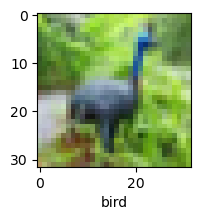

In [48]:
plot_sample(X_train, y_train, 6)

In [72]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]


In [50]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

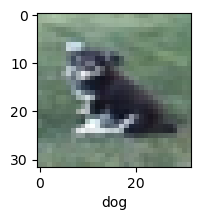

In [51]:
plot_sample(X_train, y_train, 70)

In [28]:
X_train = X_train / 255.0
X_test = X_test / 255.0


C:\Users\bishn\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\bishn\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 306s 387ms/step - accuracy: 0.2826 - loss: 2.2378 - val_accuracy: 0.4307 - val_loss: 1.6596 - learning_rate: 0.0010
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 293s 374ms/step - accuracy: 0.4663 - loss: 1.4849 - val_accuracy: 0.5126 - val_loss: 1.4741 - learning_rate: 0.0010
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 301s 384ms/step - accuracy: 0.5558 - loss: 1.2390 - val_accuracy: 0.6441 - val_loss: 1.0726 - learning_rate: 0.0010
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 285s 364ms/step - accuracy: 0.6162 - loss: 1.0906 - val_accuracy: 0.6577 - val_loss: 1.0351 - learning_rate: 0.0010
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 283s 362ms/step - accuracy: 0.6484 - loss: 1.0034 - val_accuracy: 0.7120 - val_loss: 0.8702 - learning_rate: 0.0010
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 283s 362ms/step - accuracy: 0.6766 - loss: 0.9390 - val_accuracy: 0.6607 - val_loss: 1.0783 - learning_rate: 0.0010
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 289s 370ms/step - accura

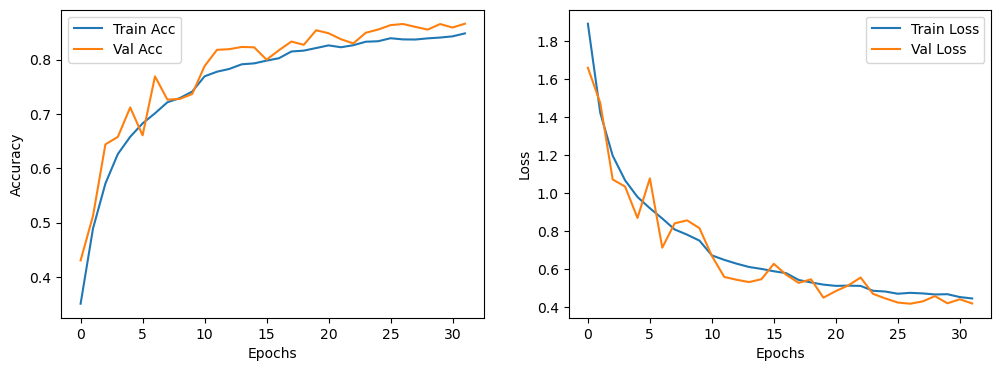

In [37]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import AdamW
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
import matplotlib.pyplot as plt

# Load CIFAR-10 Dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize pixel values (0 to 1)

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=20, width_shift_range=0.2, height_shift_range=0.2,
    horizontal_flip=True, zoom_range=0.2, shear_range=0.2
)
datagen.fit(x_train)

# Define CNN Model
model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),

    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.4),

    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.5),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# Compile Model
optimizer = AdamW(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Callbacks
lr_schedule = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train Model
history = model.fit(datagen.flow(x_train, y_train, batch_size=64),
                    validation_data=(x_test, y_test),
                    epochs=50, callbacks=[lr_schedule, early_stopping])

# Evaluate Model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"✅ Test Accuracy: {test_acc:.4f}, Test Loss: {test_loss:.4f}")

# Plot Training History
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [38]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


array([[1.0483091e-02, 3.7886169e-02, 1.6891377e-02, 4.7323874e-01,
        7.5916490e-03, 2.2675368e-01, 3.4935132e-02, 1.2636089e-02,
        1.6132215e-01, 1.8261842e-02],
       [1.2444742e-02, 1.3482763e-01, 3.9270697e-05, 1.9209410e-05,
        4.1559115e-06, 7.7138071e-07, 5.5195242e-06, 1.6753377e-06,
        8.4969389e-01, 2.9631204e-03],
       [5.5217087e-02, 2.2209056e-01, 3.8177869e-03, 2.7618380e-03,
        1.2318532e-03, 4.5892296e-04, 1.3482645e-03, 4.6606557e-04,
        6.6500062e-01, 4.7606986e-02],
       [6.5477502e-01, 2.0290906e-02, 6.0537059e-02, 3.8723000e-03,
        1.3130948e-02, 7.0406019e-04, 2.0746042e-03, 1.2150599e-03,
        2.3424792e-01, 9.1522159e-03],
       [4.4021353e-06, 4.0019186e-06, 8.9708222e-03, 4.2538280e-03,
        1.5737028e-01, 7.4321759e-04, 8.2845134e-01, 1.8873031e-04,
        4.0647728e-06, 9.3829249e-06]], dtype=float32)

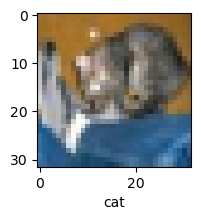

In [82]:
y_test = y_test.reshape(-1,)
plot_sample(X_test, y_test, 0)


In [74]:
y_classes = [np.argmax(element) for element in y_pred]

In [84]:
classes[y_classes[0]]

'cat'